▶ 구조 설명
layer_1: 질화규소, layer_2: 이산화규소, layer_3: 질화규소, layer_4: 이산화 규소, 규소 기판 총 5층 구조

▶ 대회 목적: 파장에 따른 반사율을 통해 layer_1~layer_4의 두께 예측

▶ 데이터 설명
4층 박막의 두께와 파장에 따른 반사율 스펙트럼(빛의 파장에 해당하는 반사율)
0~255 컬럼명은 파장을 뜻하며 비식별화 처리

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/2021_TNT Winter/5주차')

In [ ]:
import pandas as pd
import warnings
import missingno as msno

import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.shape

(810000, 230)

In [ ]:
train.head()

,layer_1,layer_2,layer_3,layer_4,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,...,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225
0,10,10,10,10,0.254551,0.258823,0.254659,0.252085,0.247678,0.253614,0.246511,0.259407,0.260862,0.242524,0.253870,0.245156,0.245548,0.255501,0.228948,0.228632,0.225802,0.249418,0.246910,0.248747,0.251088,0.244886,0.233906,0.242632,0.221792,0.236521,0.220555,0.243761,0.230202,0.226122,0.220671,0.235075,0.224560,0.226998,0.209499,0.226594,...,0.160126,0.164192,0.171406,0.162364,0.168591,0.166626,0.169696,0.196383,0.194145,0.190646,0.186797,0.191748,0.190886,0.208518,0.211220,0.229286,0.226265,0.226954,0.229023,0.237112,0.262421,0.262566,0.272062,0.292049,0.305353,0.292889,0.317479,0.316911,0.321371,0.355636,0.354750,0.369223,0.388184,0.408496,0.414564,0.429403,0.419225,0.443250,0.433414,0.465502
1,10,10,10,20,0.205062,0.225544,0.217758,0.202169,0.199633,0.207380,0.191318,0.195369,0.200536,0.197588,0.198726,0.191803,0.199625,0.206465,0.182836,0.193341,0.180459,0.196416,0.185398,0.188913,0.176011,0.173457,0.182249,0.176816,0.192716,0.185924,0.183816,0.186900,0.161040,0.173525,0.172948,0.182634,0.161153,0.158073,0.152335,0.148293,...,0.327076,0.331195,0.337722,0.340189,0.342748,0.351925,0.372989,0.389663,0.396216,0.384977,0.383701,0.403894,0.406382,0.429342,0.409908,0.439307,0.432569,0.439114,0.459541,0.454988,0.475268,0.478575,0.483466,0.496912,0.499542,0.522705,0.524767,0.533952,0.558729,0.572470,0.557203,0.573656,0.587998,0.612754,0.627825,0.633393,0.637706,0.625981,0.653231,0.637853
2,10,10,10,30,0.189196,0.165869,0.177655,0.156822,0.175094,0.177755,0.157582,0.158885,0.156911,0.166162,0.148831,0.144950,0.151362,0.145110,0.159201,0.139296,0.145313,0.156555,0.145363,0.150352,0.150542,0.142990,0.139572,0.145669,0.144514,0.126263,0.112832,0.117535,0.111473,0.117545,0.107058,0.119299,0.110768,0.124217,0.124496,0.110023,...,0.525450,0.532645,0.539097,0.527091,0.531925,0.530325,0.551716,0.556125,0.567470,0.549711,0.566789,0.574313,0.569873,0.574390,0.601672,0.584206,0.602981,0.598708,0.615189,0.637023,0.626458,0.645439,0.629203,0.640967,0.652762,0.660495,0.676498,0.674599,0.693535,0.699182,0.699864,0.708688,0.721982,0.713464,0.743030,0.741709,0.747743,0.746037,0.737356,0.750391
3,10,10,10,40,0.131003,0.120076,0.138975,0.117931,0.130566,0.131262,0.126962,0.134453,0.106717,0.127309,0.099958,0.112908,0.106853,0.108288,0.101393,0.094074,0.086854,0.099669,0.107276,0.091117,0.084525,0.078293,0.076476,0.078559,0.072960,0.075898,0.067963,0.066055,0.087904,0.065373,0.075469,0.080097,0.068895,0.058148,0.057882,0.063258,...,0.616934,0.638654,0.630914,0.647135,0.629796,0.644114,0.641825,0.645360,0.653030,0.656335,0.657734,0.678019,0.676713,0.681540,0.673333,0.686743,0.697500,0.702650,0.693750,0.711013,0.714411,0.701010,0.726972,0.719394,0.726329,0.730821,0.740062,0.747356,0.749405,0.766173,0.764786,0.763788,0.770017,0.787571,0.778866,0.776969,0.774712,0.801526,0.805305,0.784057
4,10,10,10,50,0.091033,0.086893,0.108125,0.080405,0.105917,0.077083,0.097895,0.086765,0.078676,0.075729,0.086023,0.070649,0.078957,0.072772,0.069867,0.080523,0.068273,0.074660,0.069852,0.047442,0.067855,0.049580,0.068737,0.041386,0.048697,0.040278,0.050234,0.059371,0.042581,0.037117,0.041503,0.055113,0.034001,0.035846,0.030385,0.048935,...,0.670888,0.692846,0.673025,0.704448,0.696657,0.697524,0.692513,0.714224,0.696880,0.716361,0.723607,0.720018,0.715039,0.705079,0.720913,0.723440,0.719858,0.729948,0.731360,0.728861,0.740501,0.738362,0.749341,0.738456,0.768791,0.770292,0.766630,0.779970,0.787695,0.766521,0.786677,0.802271,0.806557,0.799614,0.789333,0.804087,0.787763,0.794948,0.819105,0.801781


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810000 entries, 0 to 809999
Columns: 230 entries, layer_1 to 225
dtypes: float64(226), int64(4)
memory usage: 1.4 GB


In [ ]:
test.shape

(10000, 227)

In [ ]:
test.head()

,id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225
0,0,0.535410,0.520775,0.494087,0.465134,0.430339,0.401751,0.355986,0.326427,0.282340,0.216756,0.181081,0.128061,0.090104,0.071084,0.027930,0.025360,0.035067,0.084959,0.119919,0.167098,0.219223,0.264180,0.303416,0.359825,0.383026,0.437603,0.457129,0.511524,0.525033,0.544154,0.558287,0.588944,0.591619,0.604344,0.594368,0.616329,0.617499,0.616428,0.622483,...,0.608499,0.598381,0.586389,0.552573,0.527883,0.488114,0.445729,0.418668,0.354205,0.280794,0.201839,0.131517,0.062330,0.028610,0.008230,0.036909,0.076047,0.141627,0.219861,0.305271,0.402317,0.465201,0.527406,0.590492,0.637339,0.649940,0.692388,0.703576,0.714609,0.750994,0.748339,0.757575,0.768130,0.777062,0.769173,0.768253,0.738704,0.739460,0.702139,0.702238
1,1,0.351099,0.398179,0.413809,0.418529,0.433257,0.455410,0.451065,0.464230,0.476011,0.477219,0.480153,0.472766,0.477897,0.479871,0.449263,0.450770,0.426963,0.430181,0.404833,0.392706,0.363237,0.343717,0.335713,0.314341,0.315998,0.297495,0.287035,0.285863,0.260355,0.278014,0.287343,0.311354,0.308082,0.326284,0.344012,0.364763,0.415674,0.431457,0.457605,...,0.282865,0.247342,0.218508,0.192622,0.176362,0.177834,0.202651,0.233547,0.262714,0.279799,0.309807,0.361826,0.394869,0.445743,0.450590,0.500176,0.509348,0.527510,0.555326,0.554006,0.573417,0.571737,0.567435,0.565504,0.546848,0.543153,0.512139,0.481228,0.458004,0.415012,0.333931,0.276307,0.211513,0.159223,0.110982,0.083130,0.099780,0.145420,0.260501,0.343857
2,2,0.490537,0.435958,0.413428,0.355796,0.335777,0.299944,0.242745,0.210555,0.180739,0.169717,0.140995,0.135154,0.148676,0.157423,0.192680,0.198092,0.231736,0.271318,0.287700,0.318439,0.341857,0.354556,0.368073,0.387608,0.396274,0.384137,0.373089,0.376440,0.365251,0.362339,0.338969,0.334446,0.305304,0.294452,0.267052,0.222056,0.179539,0.153937,0.128803,...,0.625039,0.648118,0.667911,0.666281,0.678367,0.680844,0.703117,0.705182,0.710873,0.683992,0.688223,0.678797,0.652492,0.629479,0.623222,0.565390,0.536286,0.476455,0.430758,0.387187,0.314787,0.285794,0.246694,0.267691,0.320559,0.390549,0.476316,0.541130,0.618077,0.671256,0.709371,0.746826,0.781436,0.788292,0.828630,0.835166,0.845859,0.846032,0.836724,0.846779
3,3,0.051634,0.075802,0.133983,0.154546,0.209387,0.251700,0.287552,0.333000,0.340617,0.393592,0.395593,0.434982,0.452452,0.474573,0.485643,0.493653,0.499292,0.522628,0.538426,0.528165,0.525234,0.520464,0.517862,0.516856,0.505803,0.500806,0.482355,0.467268,0.473142,0.431643,0.419620,0.398908,0.359098,0.316537,0.281483,0.249556,0.211823,0.165437,0.138461,...,0.315134,0.370213,0.395653,0.443499,0.455095,0.495142,0.515139,0.537473,0.560510,0.575864,0.586124,0.612198,0.613693,0.618326,0.606939,0.614141,0.615549,0.608026,0.582855,0.579895,0.558670,0.515708,0.506560,0.455626,0.411034,0.356563,0.300022,0.236862,0.168320,0.121919,0.075046,0.056651,0.079884,0.147469,0.213112,0.298096,0.382823,0.489381,0.562383,0.599247
4,4,0.154031,0.201728,0.270414,0.283799,0.343050,0.340233,0.379244,0.378511,0.373017,0.364702,0.361612,0.324792,0.303544,0.260080,0.213303,0.175923,0.115428,0.079285,0.045183,0.013776,0.049571,0.070298,0.147067,0.188333,0.267400,0.327930,0.400379,0.463853,0.492871,0.525006,0.559372,0.596083,0.591871,0.604874,0.605171,0.624277,0.609818,0.597025,0.593711,...,0.783075,0.784513,0.737285,0.732940,0.679529,0.623679,0.551320,0.499520,0.413406,0.385228,0.379831,0.399972,0.443645,0.491499,0.561842,0.609885,0.641345,0.676475,0.693973,0.699555,0.711892,0.703251,0.700238,0.666234,0.663044,0.619070,0.555979,0.494927,0.415850,0.305639,0.255070,0.242396,0.271287,0.328828,0.397950,0.486436,0.530573,0.582752,0.637296,0.637238


In [ ]:
pd.set_option('display.max_columns', 230)

train.describe()

,layer_1,layer_2,layer_3,layer_4,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225
count,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810

In [ ]:
#독립변수와 종속변수를 분리합니다.
train_X = train.iloc[:,4:]
train_Y = train.iloc[:,0:4]
test_X = test.iloc[:,1:]

# **DNN으로 접근**

정의: 모델의 은닉층을 많이 늘리면서 학습의 결과를 향상시키는 방법으로 은닉층을 2개 이상 갖고 있는 학습 방법

특징: 컴퓨터 스스로 학습을 반복하여 최적의 weight를 도출해내어 결과를 도출

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense, Dropout, BatchNormalization

model = Sequential()  # model 초기화 
model.add(Dense(units=160, activation='relu', input_dim=226))  # 첫번째 은닉층  # 226개 feature, 160개 뉴런, relu 함수를 활성화 함수로 사용
model.add(Dense(units=160, activation='relu'))   # 두번째 은닉층  
model.add(Dense(units=160, activation='relu'))   # 세번째 은닉층
model.add(Dense(units=4, activation='linear'))   # 출력층 (4개의 output을 도출해내야되기 때문에 units = 4)

**Relu**

0부터 무한대까지의 범위를 가진 선형 함수로 vanishing gradient 현상을 해결하기 위해 나온 함수로 underfitting을 막을 수 있음.
sigmoid와 tanh에 비해 수렴되는 속도가 빠름

상대적으로 연산량이 많은 지수함수를 사용하지 않아 컴퓨터의 연산에 대한 부담을 줄여주고,
lr 을 조절하여 dying Relu problem을 해결해야함

In [ ]:
#모델을 컴파일합니다.
# adam: momentum과 gradient 히스토리를 모두 고려하는 방식 
model.compile(loss='mae', optimizer='adam', metrics=['mae'])

In [ ]:
#모델을 학습합니다.
model.fit(train_X, train_Y, epochs=100, batch_size=18000, validation_split = 0.05)

Epoch 1/100
43/43 [==============================] - 8s 172ms/step - loss: 137.3346 - mae: 137.3346 - val_loss: 98.8481 - val_mae: 98.8481
Epoch 2/100
43/43 [==============================] - 7s 158ms/step - loss: 75.7910 - mae: 75.7910 - val_loss: 92.8906 - val_mae: 92.8906
Epoch 3/100
43/43 [==============================] - 7s 159ms/step - loss: 74.8080 - mae: 74.8080 - val_loss: 93.9446 - val_mae: 93.9446
Epoch 4/100
43/43 [==============================] - 7s 159ms/step - loss: 74.5669 - mae: 74.5669 - val_loss: 94.1517 - val_mae: 94.1517
Epoch 5/100
43/43 [==============================] - 7s 158ms/step - loss: 74.2227 - mae: 74.2227 - val_loss: 93.3359 - val_mae: 93.3359
Epoch 6/100
43/43 [==============================] - 7s 158ms/step - loss: 73.3915 - mae: 73.3915 - val_loss: 92.6951 - val_mae: 92.6951
Epoch 7/100
43/43 [==============================] - 7s 159ms/step - loss: 71.9947 - mae: 71.9947 - val_loss: 91.2812 - val_mae: 91.2812
Epoch 8/100
43/43 [====================

In [ ]:
losses = pd.DataFrame(model.history.history)

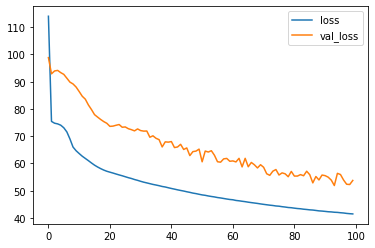

In [ ]:
losses[['loss', 'val_loss']].plot()

In [ ]:
model = Sequential()  # model 초기화 
model.add(Dense(units=452, activation='relu', input_dim=226))  # 첫번째 은닉층  # 226개 feature, 160개 뉴런, relu 함수를 활성화 함수로 사용
model.add(BatchNormalization())
model.add(Dense(units=226, activation='relu'))   # 두번째 은닉층  
model.add(BatchNormalization())
model.add(Dense(units=113, activation='relu'))   # 세번째 은닉층
model.add(BatchNormalization())
model.add(Dense(units=4, activation='linear'))   # 출력층 (4개의 output을 도출해내야되기 때문에 units = 4)

In [ ]:
model.compile(loss='mae', optimizer='adam', metrics=['mae'])

In [ ]:
history = model.fit(train_X, train_Y, epochs=30, batch_size=1000, validation_split = 0.05)

Epoch 1/30
770/770 [==============================] - 28s 35ms/step - loss: 136.0588 - mae: 136.0588 - val_loss: 71.7807 - val_mae: 71.7807
Epoch 2/30
770/770 [==============================] - 26s 34ms/step - loss: 50.9803 - mae: 50.9803 - val_loss: 57.7469 - val_mae: 57.7469
Epoch 3/30
770/770 [==============================] - 27s 34ms/step - loss: 33.7115 - mae: 33.7115 - val_loss: 47.7794 - val_mae: 47.7794
Epoch 4/30
770/770 [==============================] - 27s 35ms/step - loss: 27.4070 - mae: 27.4070 - val_loss: 46.4393 - val_mae: 46.4393
Epoch 5/30
770/770 [==============================] - 27s 35ms/step - loss: 24.5860 - mae: 24.5860 - val_loss: 42.1261 - val_mae: 42.1261
Epoch 6/30
770/770 [==============================] - 27s 35ms/step - loss: 22.8295 - mae: 22.8295 - val_loss: 41.5078 - val_mae: 41.5078
Epoch 7/30
770/770 [==============================] - 27s 34ms/step - loss: 21.6822 - mae: 21.6822 - val_loss: 40.1908 - val_mae: 40.1908
Epoch 8/30
770/770 [============

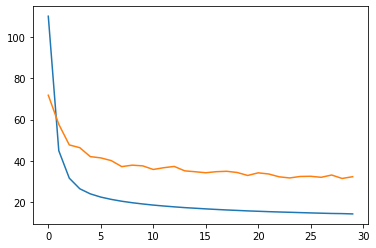

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
#예측값을 생성합니다.
pred_test = model.predict(test_X)

In [ ]:
#submission 파일을 생성합니다.
sample_sub = pd.read_csv('sample_submission.csv', index_col=0)
submission = sample_sub+pred_test
submission.to_csv('submission2_30_batch_add.csv')

# **표준정규화 적용**

In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
scaler = StandardScaler()

# fit은 train에만 
train_x = scaler.fit_transform(train_X)
test_x = scaler.transform(test_X)

train_y = scaler.fit_transform(train_Y)

In [ ]:
model = Sequential()  # model 초기화 
model.add(Dense(units=452, activation='relu', input_dim=226))  # 첫번째 은닉층  # 226개 feature, 160개 뉴런, relu 함수를 활성화 함수로 사용
model.add(Dense(units=226, activation='relu'))   # 두번째 은닉층  
model.add(Dense(units=113, activation='relu'))   # 세번째 은닉층
model.add(Dense(units=4, activation='linear'))   # 출력층 (4개의 output을 도출해내야되기 때문에 units = 4)

In [ ]:
model.compile(loss='mae', optimizer='adam', metrics=['mae'])

In [ ]:
history = model.fit(train_x, train_y, epochs=30, batch_size=1000, validation_split = 0.05)

Epoch 1/30
770/770 [==============================] - 19s 23ms/step - loss: 0.5290 - mae: 0.5290 - val_loss: 0.5368 - val_mae: 0.5368
Epoch 2/30
770/770 [==============================] - 18s 23ms/step - loss: 0.3227 - mae: 0.3227 - val_loss: 0.4591 - val_mae: 0.4591
Epoch 3/30
770/770 [==============================] - 18s 23ms/step - loss: 0.2675 - mae: 0.2675 - val_loss: 0.4295 - val_mae: 0.4295
Epoch 4/30
770/770 [==============================] - 18s 23ms/step - loss: 0.2379 - mae: 0.2379 - val_loss: 0.4076 - val_mae: 0.4076
Epoch 5/30
770/770 [==============================] - 18s 24ms/step - loss: 0.2184 - mae: 0.2184 - val_loss: 0.3932 - val_mae: 0.3932
Epoch 6/30
770/770 [==============================] - 18s 24ms/step - loss: 0.2035 - mae: 0.2035 - val_loss: 0.3676 - val_mae: 0.3676
Epoch 7/30
770/770 [==============================] - 18s 24ms/step - loss: 0.1928 - mae: 0.1928 - val_loss: 0.3759 - val_mae: 0.3759
Epoch 8/30
770/770 [==============================] - 18s 24ms

In [ ]:
pred_test = model.predict(test_x)

In [ ]:
pred_test = scaler.inverse_transform(pred_test)

In [ ]:
#submission 파일을 생성합니다.
sample_sub = pd.read_csv('sample_submission.csv', index_col=0)
submission = sample_sub+pred_test
submission.to_csv('submission2_scaler.csv')